In [32]:
import pandas as pd

In [33]:
df=pd.read_csv("HW.csv")
df.drop('Index', axis=1, inplace=True)
df.head(10)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
5,68.69784,123.3024
6,69.80204,141.4947
7,70.01472,136.4623
8,67.90265,112.3723
9,66.78236,120.6672


In [34]:
x=df.iloc[:,[0,1]].values

In [35]:
x

array([[ 65.78331, 112.9925 ],
       [ 71.51521, 136.4873 ],
       [ 69.39874, 153.0269 ],
       ...,
       [ 64.69855, 118.2655 ],
       [ 67.52918, 132.2682 ],
       [ 68.87761, 124.8742 ]])

In [36]:
x.ndim

2

In [37]:
from sklearn.cluster import KMeans

In [38]:
model=KMeans(n_clusters=2)
model.fit(x)

KMeans(n_clusters=2)

In [39]:
y_pred=model.predict(x)
y_pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int32)

Silhouette Score for 2 clusters: 0.5252
Silhouette Score for 3 clusters: 0.4865
Silhouette Score for 4 clusters: 0.4668
Silhouette Score for 5 clusters: 0.4475
Silhouette Score for 6 clusters: 0.4321
Silhouette Score for 7 clusters: 0.4179


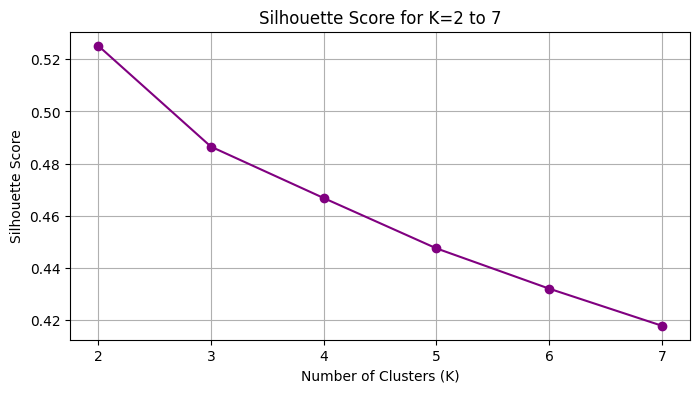

In [40]:
# Silhouette Score visualization for 2 to 7 clusters
import matplotlib.pyplot as plt
scores = []
cluster_range = range(2, 8)

for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    scores.append(score)
    print(f"Silhouette Score for {k} clusters: {score:.4f}")

# Plotting silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, scores, marker='o', color='purple')
plt.title('Silhouette Score for K=2 to 7')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [41]:
x[y_pred==0,0]

array([65.78331, 68.69784, 67.90265, ..., 64.54826, 64.69855, 68.87761])

In [42]:
x[y_pred==0,1]

array([112.9925, 123.3024, 112.3723, ..., 120.1932, 118.2655, 124.8742])

In [43]:
x[y_pred==1,0]

array([71.51521, 69.39874, 68.2166 , ..., 70.96218, 67.21126, 67.52918])

In [44]:
x[y_pred==1,1]

array([136.4873, 153.0269, 142.3354, ..., 146.1936, 127.6603, 132.2682])

Enter height: 72
Enter weight: 100


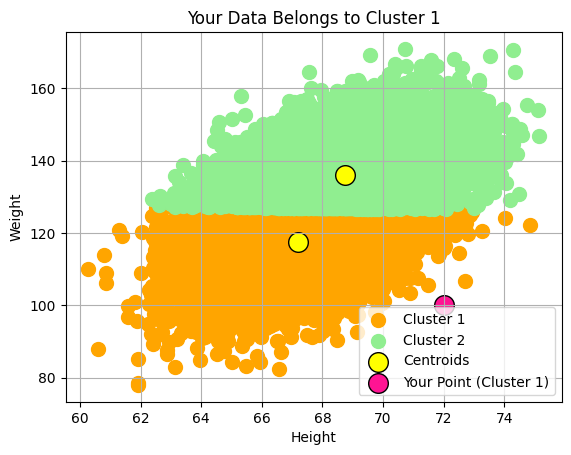

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for clusters
colors = ['orange', 'lightgreen', 'blue', 'orange', 'purple']

# Plot each cluster dynamically using the unique labels from y_pred
unique_clusters = np.unique(y_pred)
for cluster in unique_clusters:
    plt.scatter(
        x[y_pred == cluster, 0],
        x[y_pred == cluster, 1],
        s=100,
        c=colors[cluster],
        label=f'Cluster {cluster + 1}'
    )

# Plot cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='yellow', s=200, label='Centroids', edgecolor='black')

# Step 1: Input new data
new_height = float(input("Enter height: "))
new_weight = float(input("Enter weight: "))
new_data = np.array([[new_height, new_weight]])

# Step 2: Predict cluster for new data
new_cluster = model.predict(new_data)[0]

# Step 3: Plot the new point in the color of its predicted cluster
plt.scatter(
    new_data[0, 0],
    new_data[0, 1],
    color='deeppink',              # Use any color you like here
    edgecolor='black',
    s=200,
    label=f'Your Point (Cluster {new_cluster + 1})',
    marker='o'
)


# Final plot settings
plt.title(f'Your Data Belongs to Cluster {new_cluster + 1}')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
!pip install streamlit pyngrok scikit-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [50]:
!pkill -f streamlit
!pkill -f ngrok


In [51]:
%%writefile app.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
from numpy.linalg import norm

st.set_page_config(page_title="Cluster Classifier", page_icon="🧠", layout="centered")
# 🎨 Gradient background + Custom Button Styling (Purple)
st.markdown("""
    <style>
    .stApp {
        background: linear-gradient(to right, #fff7e6, #ffd9b3);
        background-attachment: fixed;
    }
    div.stButton > button {
        background-color: #9b59b6;  /* Purple */
        color: white;
        font-weight: bold;
        border-radius: 10px;
        height: 3em;
        width: 100%;
        transition: background-color 0.3s ease;
        font-size: 1rem;
    }
    div.stButton > button:hover {
        background-color: #7d3c98;  /* Darker Purple on hover */
        color: black;
    }
    </style>
""", unsafe_allow_html=True)

# 🎨 Gradient background
st.markdown(
    """
    <style>
        .stApp {
            background: linear-gradient(to right, #fff7e6, #ffd9b3);
            background-attachment: fixed;
        }
    </style>
    """,
    unsafe_allow_html=True
)

# Load saved model and data
if os.path.exists("model_data.pkl"):
    x, model = joblib.load("model_data.pkl")
    y_pred = model.predict(x)
else:
    st.error("❌ Trained model not found. Please upload model_data.pkl")
    st.stop()

# Initialize session state
if "user_points" not in st.session_state:
    st.session_state.user_points = []

# Page Title
st.markdown("""
    <style>
    .typewriter-wrapper {
        display: flex;
        justify-content: center;
        align-items: center;
        width: 100%;
    }

    .typewriter {
        width: 45ch;  /* Set wide enough for full title */
        overflow: hidden;
        border-right: .15em solid #6f42c1;
        white-space: nowrap;
        animation: typing 4s steps(45, end), blink-caret .75s step-end 6 forwards;
        color: #6f42c1;
        font-size: 2.2em;
        font-weight: bold;
        font-family: 'Courier New', monospace;
    }

    @keyframes typing {
        from { width: 0 }
        to { width: 45ch }
    }

    @keyframes blink-caret {
        from, to { border-color: transparent }
        50% { border-color: #6f42c1; }
    }
    </style>

    <div class="typewriter-wrapper">
        <div class="typewriter">📊Height-Weight Cluster Predictor</div>
    </div>
""", unsafe_allow_html=True)


st.markdown(
    "<h4 style='color:#666;text-align:center;'>A smart way to identify physical groups using K-Means</h4><hr>",
    unsafe_allow_html=True
)
# Layout with columns
col1, col2 = st.columns(2)
with col1:
    height = st.number_input("🧍‍♀️ Enter Height (inches)", min_value=0.0, step=0.1)
with col2:
    weight = st.number_input("🏋️‍♂️ Enter Weight (lbs)", min_value=0.0, step=0.1)

# Prediction button
if st.button("🚀 Predict and Visualize"):
    new_point = np.array([[height, weight]])
    predicted_cluster = model.predict(new_point)[0]
    st.session_state.user_points.append((height, weight, predicted_cluster))

    # Cluster description
    descriptions = {
        0: "🟥 **Cluster 1**: Individuals with **shorter height and lower weight**.",
        1: "🟩 **Cluster 2**: Individuals with **taller height and higher weight**."
    }

    cluster_center = model.cluster_centers_[predicted_cluster]
    distance = norm(new_point - cluster_center)

    st.success(f"✅ You belong to **Cluster {predicted_cluster + 1}**")
    st.markdown(descriptions.get(predicted_cluster, "No description available."), unsafe_allow_html=True)

    if distance < 5:
        st.success("🎯 Your body measurements are a **perfect match** for this group.")
    elif distance < 10:
        st.info("📏 Your values are **close to average** for this cluster.")
    else:
        st.warning("🧭 You are a bit **different from the cluster average**.")

# Clear data button
if st.button("🧹 Clear All Points"):
    st.session_state.user_points = []
    st.success("All user-entered data has been cleared!")
# Plotting
colors = ['orange', '#90EE90','red', 'green', 'blue']
fig, ax = plt.subplots()

for cluster in np.unique(y_pred):
    ax.scatter(x[y_pred == cluster, 0], x[y_pred == cluster, 1],
               c=colors[cluster], label=f"Cluster {cluster + 1}", s=100)

# Centroids
ax.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
           c='black', s=250, label='Centroids', edgecolor='black', marker='X')

# User points
for pt in st.session_state.user_points:
    ax.scatter(pt[0], pt[1], color='#b01b7c', edgecolor='black',
               s=200, label=f"Your Point (Cluster {pt[2] + 1})")

ax.set_xlabel("Height")
ax.set_ylabel("Weight")
ax.set_title(" Cluster Visualization with Your Data")
ax.grid(True)
ax.legend()
st.pyplot(fig)

# Footer
st.markdown("<hr><center style='color:#000000;'>Made with ❤️Mk</center>", unsafe_allow_html=True)


Writing app.py


In [52]:
from pyngrok import ngrok

# Replace the string below with your actual authtoken
ngrok.set_auth_token("2yxcCeHpwCuhzFvvyR5YdPjBrCf_3Wj5t1b4q21ZZRsVx3HvP")

In [53]:
import joblib
# Train model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(x)
y_pred = model.predict(x)
# Save data and model
joblib.dump((x, model), "model_data.pkl")

['model_data.pkl']

In [54]:
from pyngrok import ngrok
!pkill -f streamlit  # ensure old sessions are killed
!pkill -f ngrok

# Start streamlit app in background
!streamlit run app.py &> /dev/null &

# Create new tunnel
url = ngrok.connect(addr="8501")
print("Click here to open the Streamlit app:", url)

Click here to open the Streamlit app: NgrokTunnel: "https://346b-34-81-190-31.ngrok-free.app" -> "http://localhost:8501"
